# YOUR PROJECT TITLE

Imports and set magics:

In [55]:
# The DST API wrapper
%pip install git+https://github.com/elben10/pydst

  Running command git clone -q https://github.com/elben10/pydst 'C:\Users\masat\AppData\Local\Temp\pip-req-build-fu_ohttv'



  Cloning https://github.com/elben10/pydst to c:\users\masat\appdata\local\temp\pip-req-build-fu_ohttv


In [56]:
import numpy as np
import pandas as pd
import datetime

import pandas_datareader # install with `pip install pandas-datareader`
import pydst # install with `pip install git+https://github.com/elben10/pydst`

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# Read and clean data

### 1-1. Import **Renewable energy consumption** data manually, and load it. 

In [91]:
# Need a different module than in the FRED case
from pandas_datareader import wb

In [92]:
# Renewable energy consumption(% of total final energy consumption)
wb_rec = wb.download(indicator='EG.FEC.RNEW.ZS', country=['DE','DK','IT','LT'], start=2000, end=2019)

wb_rec = wb_rec.rename(columns = {'EG.FEC.RNEW.ZS':'rec'})
wb_rec = wb_rec.reset_index()
wb_rec.sample(5)

,country,year,rec
33,Denmark,2006,15.26
72,Lithuania,2007,17.06
77,Lithuania,2002,17.89
32,Denmark,2007,17.69
36,Denmark,2003,12.72


In [93]:
wb_rec.year = wb_rec.year.astype(int) # convert year
wb_rec.country = wb_rec.country.astype('string') # convert country to the special pandas string type
wb_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  80 non-null     string 
 1   year     80 non-null     int32  
 2   rec      80 non-null     float64
dtypes: float64(1), int32(1), string(1)
memory usage: 1.7 KB


**Calculate among countries difference to mean of renewable energy consumption rate.**

In [103]:
wb_rec.groupby(['country'])['rec'].mean().head()

country
Denmark      22.4725
Germany      10.6920
Italy        11.5275
Lithuania    23.1465
Name: rec, dtype: float64

Split-Apply-Combine

In [132]:
# split
rec_grouped = wb_rec.groupby('country')['rec'] 
print(rec_grouped)

# apply
rec_mean = rec_grouped.mean() # mean renewable energy consumption rate
rec_mean.head()

rec_mean.name = 'rec_mean' # necessary for join

# combine
wb_rec_copy = wb_rec.set_index('country') # returns a copy
rec_ = wb_rec_copy.join(rec_mean, how='left')
rec_['rec_demean'] = rec_.rec - rec_.rec_mean
rec_.xs('Germany') # let's see the result of split-apply-combine

,year,rec,rec_mean,rec_demean
country,,,,
Germany,2019,17.17,10.692,6.478
Germany,2018,16.12,10.692,5.428
Germany,2017,15.22,10.692,4.528
Germany,2016,14.24,10.692,3.548
Germany,2015,14.55,10.692,3.858
Germany,2014,14.02,10.692,3.328
Germany,2013,13.63,10.692,2.938
Germany,2012,13.64,10.692,2.948
Germany,2011,12.54,10.692,1.848


### 1-2. Import **GDP per capita growth** data manually, and load it. 

In [74]:
# GDP per capita growth (% annual)
wb_gdp = wb.download(indicator='NY.GDP.PCAP.KD.ZG', country=['DE','DK','LT','IT'], start=2000, end=2019)

wb_gdp = wb_gdp.rename(columns = {'NY.GDP.PCAP.KD.ZG':'gdp'})
wb_gdp = wb_gdp.reset_index()
wb_gdp.sample(5)

,country,year,gdp
29,Denmark,2010,1.419487
48,Italy,2011,0.534287
32,Denmark,2007,0.462731
27,Denmark,2012,-0.149916
72,Lithuania,2007,12.435250


In [75]:
wb_gdp.year = wb_gdp.year.astype(int) # convert year
wb_gdp.country = wb_gdp.country.astype('string') # convert country to the special pandas string type
wb_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  80 non-null     string 
 1   year     80 non-null     int32  
 2   gdp      80 non-null     float64
dtypes: float64(1), int32(1), string(1)
memory usage: 1.7 KB


**Calculate among countries difference to mean of GDP per capita growth rate.**

In [104]:
wb_gdp.groupby(['country'])['gdp'].mean().head()

country
Denmark      0.938160
Germany      1.305578
Italy        0.169534
Lithuania    5.428168
Name: gdp, dtype: float64

Split-Apply-Combine

In [128]:
# split
gdp_grouped = wb_gdp.groupby('country')['gdp'] 
print(gdp_grouped)

# apply
gdp_mean = gdp_grouped.mean() # mean GDP per capita growth rate
gdp_mean.head()

gdp_mean.name = 'gdp_mean' # necessary for join

# combine
wb_gdp_copy = wb_gdp.set_index('country') # returns a copy
gdp_ = wb_gdp_copy.join(gdp_mean, how='left')
gdp_['gdp_demean'] = gdp_.gdp - gdp_.gdp_mean
gdp_.xs('Germany') # let's see the result of split-apply-combine

,year,gdp,gdp_mean,gdp_demean
country,,,,
Germany,2019,0.828958,1.305578,-0.476620
Germany,2018,0.678213,1.305578,-0.627365
Germany,2017,2.297206,1.305578,0.991628
Germany,2016,1.408102,1.305578,0.102524
Germany,2015,0.617105,1.305578,-0.688472
Germany,2014,1.784342,1.305578,0.478764
Germany,2013,0.163871,1.305578,-1.141707
Germany,2012,0.230161,1.305578,-1.075417
Germany,2011,5.869636,1.305578,4.564058


# Merge data sets

In [138]:
inner_rec = pd.merge( wb_rec, rec_, how='inner', on=['rec','year']) 

inner_gdp = pd.merge( wb_gdp, gdp_, how='inner', on=['gdp','year'])

inner = pd.merge(inner_rec, inner_gdp, how='inner', on=['country','year']) 
inner.head()

,country,year,rec,rec_mean,rec_demean,gdp,gdp_mean,gdp_demean
0,Germany,2019,17.17,10.692,6.478,0.828958,1.305578,-0.476620
1,Germany,2018,16.12,10.692,5.428,0.678213,1.305578,-0.627365
2,Germany,2017,15.22,10.692,4.528,2.297206,1.305578,0.991628
3,Germany,2016,14.24,10.692,3.548,1.408102,1.305578,0.102524
4,Germany,2015,14.55,10.692,3.858,0.617105,1.305578,-0.688472


In [139]:
inner.year = inner.year.astype(int) # convert year
inner.country = inner.country.astype('string') # convert country to the special pandas string type
inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     80 non-null     string 
 1   year        80 non-null     int32  
 2   rec         80 non-null     float64
 3   rec_mean    80 non-null     float64
 4   rec_demean  80 non-null     float64
 5   gdp         80 non-null     float64
 6   gdp_mean    80 non-null     float64
 7   gdp_demean  80 non-null     float64
dtypes: float64(6), int32(1), string(1)
memory usage: 5.3 KB


## Explore each data set

**Plot**: difference to mean among countries

**1**: Renewable energy consumption (% of total final energy consumption)

Text(0, 0.5, 'difference to mean')

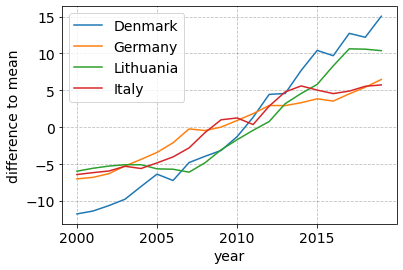

In [143]:
# plot
countries = ['Denmark','Germany','Lithuania','Italy']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for m in countries:
    rec_.xs(m).plot(x='year',y='rec_demean',ax=ax,label=m)

ax.legend(frameon=True)
ax.set_ylabel('difference to mean')

This plot can provide insights into the relative performance of each country in terms of renewable energy consumption compared to the mean. Positive values suggest that a country's renewable energy consumption is higher than the average, while negative values suggest that a country's consumption is lower than the average. This plot can help identify trends and patterns in renewable energy consumption across the four countries over the time period studied. Overall, the main trend among countries is increasing the ratio of the renewable energy in consumption through decades.

**2**: GDP per capita growth (% annual)

Text(0, 0.5, 'difference to mean')

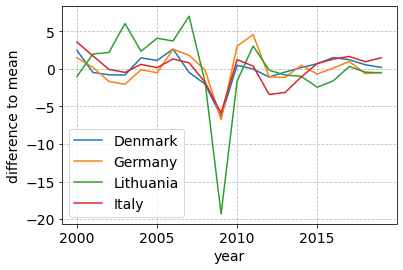

In [144]:
# plot
countries = ['Denmark','Germany','Lithuania','Italy']

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for m in countries:
    gdp_.xs(m).plot(x='year',y='gdp_demean',ax=ax,label=m)

ax.legend(frameon=True)
ax.set_ylabel('difference to mean')

The result of this analysis provides information on the relative performance of each country in terms of GDP per capita growth rate compared to the mean. Positive values in the 'gdp_demean' column suggest that a country's GDP per capita growth rate is higher than the average, while negative values suggest that a country's growth rate is lower than the average. This analysis can help identify trends and patterns in GDP per capita growth rates across the four countries over the time period studied. Overall, the main trend among countries is the stagnation of the GDP per capita growth through decades.

**Interactive plot** :

In [142]:
# Function that operates on data set
import ipywidgets as widgets
def plot_e(df, country): 
    I = df['country'] == country
    ax=df.loc[I,:].plot(x='year', y='rec_demean', style='-o', legend=False)
    ax=df.loc[I,:].plot(x='year', y='gdp_demean', style='-o', legend=False)

# Let the widget interact with data through plot_func()    
widgets.interact(plot_e, 
df = widgets.fixed(inner),
country = widgets.Dropdown(description='country', 
                                options=inner.country.unique(), 
                                value='Germany')
); 


interactive(children=(Dropdown(description='country', options=('Germany', 'Denmark', 'Italy', 'Lithuania'), va…

Explain what you see when moving elements of the interactive plot around. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.